# Lesson 3: Demos


## Normality Demo

In [1]:
#General imports
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
mtcars = pd.read_csv(join('data', 'mtcars.csv'))
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
mtcars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


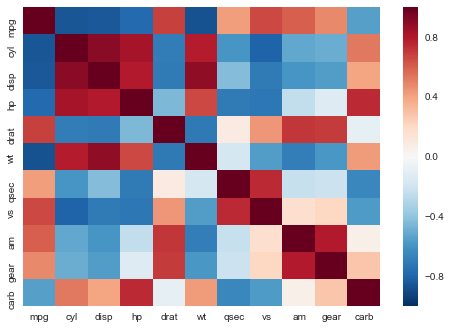

In [9]:
sns.heatmap(mtcars.corr())

Although the mean and median both give us some sense of the center of a distribution, they aren't always the same. The *median* gives us a value that **splits the data into two halves** while the *mean* is a **numeric average,** so extreme values can have a significant impact on the mean. 

In a symmetric distribution, the mean and median will be the same. Let's investigate with a density plot:

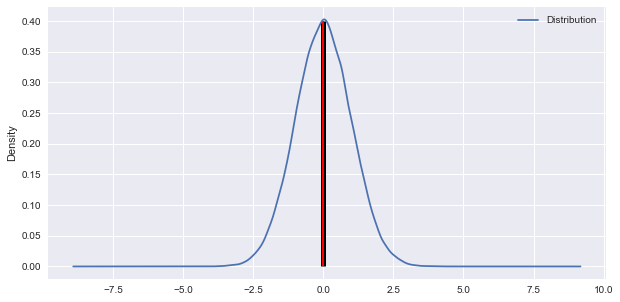

In [11]:
# Generate normal distribution
norm_data = pd.DataFrame(np.random.normal(size=100000), columns=['Distribution'])

norm_data.plot(kind="density", figsize=(10,5))

plt.vlines(norm_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=.4,
           linewidth=5.0)

plt.vlines(norm_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=.4, 
           linewidth=2.0,
           color="red");

In the plot above, the mean and median are both so close to zero that the red median line lies on top of the thicker black line drawn at the mean. 

In skewed distributions, the mean tends to get pulled in the direction of the skew, while the median tends to resist the effects of skew:
 

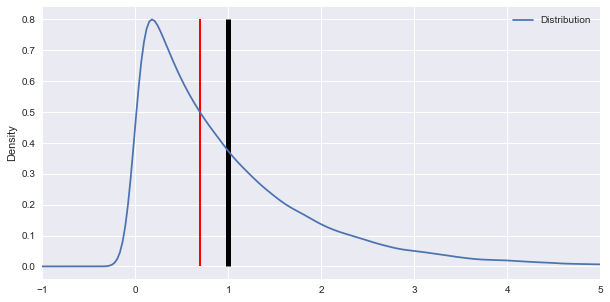

In [13]:
# Generate exponential distribution
skewed_data = pd.DataFrame(np.random.exponential(size=100000), columns=['Distribution'])

skewed_data.plot(kind="density", figsize=(10,5), xlim=(-1,5)) #DENSITY plot

plt.vlines(skewed_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.8,
           linewidth=5.0)

plt.vlines(skewed_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.8, 
           linewidth=2.0,
           color="red");

Notice that the mean is also influenced heavily by outliers, while the median resists the influence of outliers:


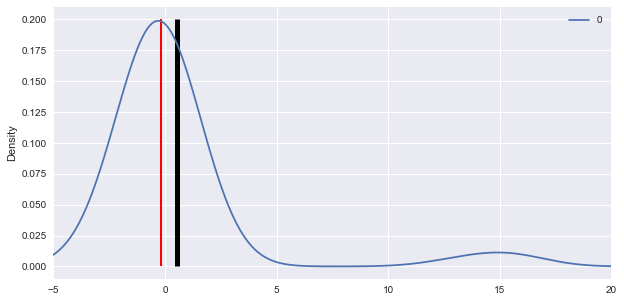

In [14]:
norm_data = np.random.normal(size=50)
outliers = np.random.normal(15, size=3) # Create 3 outliers
combined_data = pd.DataFrame(np.concatenate((norm_data, outliers), axis=0))

combined_data.plot(kind="density", figsize=(10,5), xlim=(-5,20))

plt.vlines(combined_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=5.0)

plt.vlines(combined_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2, 
           linewidth=2.0,
           color="red");

Since the median tends to resist the effects of skewness and outliers, it is known a "robust" statistic. 

The median generally gives a better sense of the typical value in a distribution with significant skew or outliers.

### Skewness and Kurtosis
*Skewness* measures the **skew or asymmetry of a distribution** while *Kurtosis* measures the **"peakedness" of a distribution**. 

We won't go into the exact calculations behind these, but they are essentially just statistics that take the idea of variance a step further: while variance involves squaring deviations from the mean, skewness involves cubing deviations from the mean, and kurtosis involves raising deviations from the mean to the 4th power.

Pandas has built in functions for checking skewness and kurtosis, df.skew() and df.kurt() respectively:

In [23]:
mtcars["mpg"].skew()  # Check skewness; POSITIVE skew means more extreme values on the RIGHT-hand side

0.67237713762908047

In [24]:
mtcars["mpg"].kurt()  # Check kurtosis; NEGATIVE kurtosis means THIN tails

-0.0220062914240855

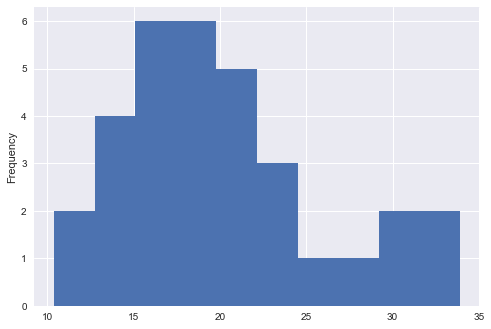

In [25]:
mtcars['mpg'].plot.hist(bins=10);

In [26]:
mtcars['mpg'].describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

***
To explore these two measures further, let's create some dummy data and inspect it:
***

In [27]:
norm_data = np.random.normal(size=100000)

In [28]:
skewed_data = np.concatenate((np.random.normal(size=35000)+2, 
                             np.random.exponential(size=65000)), 
                             axis=0)

In [29]:
uniform_data = np.random.uniform(0,2, size=100000)

In [30]:
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)

In [31]:
data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data})

## Types of distributions

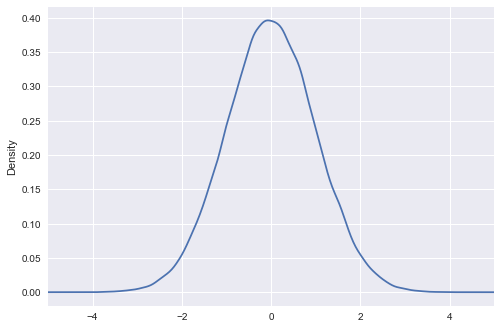

In [32]:
data_df["norm"].plot(kind="density", xlim=(-5,5));

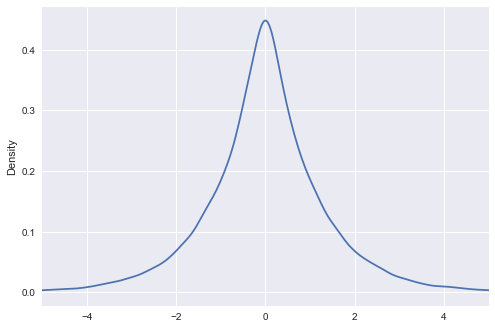

In [36]:
data_df["peaked"].plot(kind="density", xlim=(-5,5));

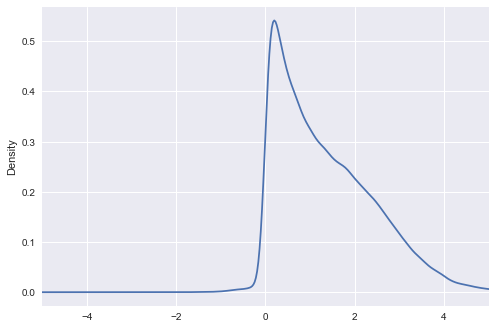

In [37]:
data_df["skewed"].plot(kind="density", xlim=(-5,5));

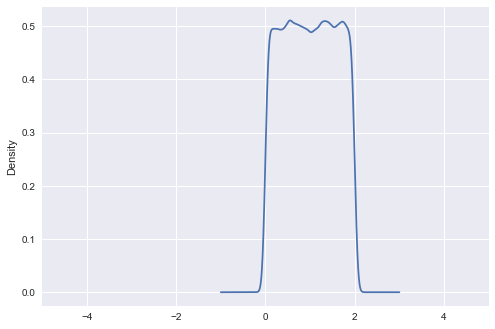

In [38]:
data_df["uniform"].plot(kind="density", xlim=(-5,5));

### All together

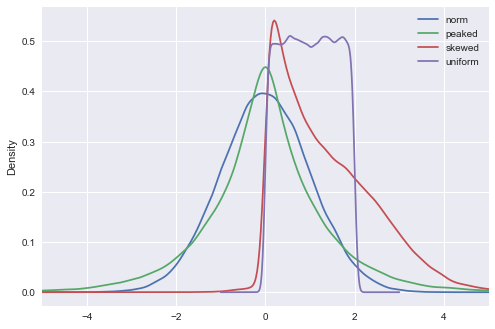

In [39]:
data_df.plot(kind="density", xlim=(-5,5));

In [40]:
data_df.describe()

,norm,peaked,skewed,uniform
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,-0.001293,0.006543,1.351295,0.999644
std,1.001828,1.407126,1.109910,0.577049
min,-4.272333,-10.619337,-2.112073,0.000003
25%,-0.674694,-0.685206,0.434967,0.502041
50%,-0.003024,-0.000005,1.107185,0.999782
75%,0.672135,0.696120,2.057195,1.498585
max,4.445827,10.506885,11.578917,1.999975


In [47]:
data_df.corr()

,norm,peaked,skewed,uniform
norm,1.000000,0.002056,-0.001751,-0.000634
peaked,0.002056,1.000000,0.223436,-0.000257
skewed,-0.001751,0.223436,1.000000,0.003963
uniform,-0.000634,-0.000257,0.003963,1.000000


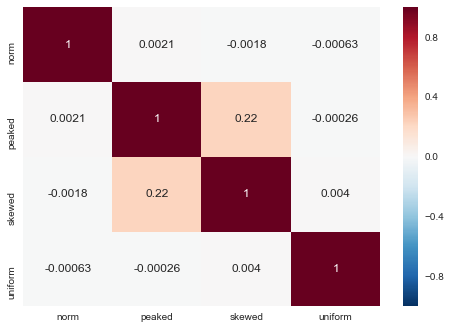

In [49]:
sns.heatmap(data_df.corr(), annot=True)

In [53]:
print("Skew of Data")
print(data_df.skew())
print("\n")
print("Kurtosis of Data")
print(data_df.kurt())

Skew of Data
norm       0.005675
peaked     0.044953
skewed     1.002377
uniform   -0.003239
dtype: float64


Kurtosis of Data
norm       0.004318
peaked     3.023554
skewed     1.286860
uniform   -1.201269
dtype: float64


### Skewness

Now let's check the skewness of each of these distributions. 

Since skewness measures asymmetry, we'd expect to see low skewness for all of the distributions except the skewed one, because all the others are roughly symmetric:

In [55]:
data_df.skew()

norm       0.005675
peaked     0.044953
skewed     1.002377
uniform   -0.003239
dtype: float64

### Kurtosis

Now let's check kurtosis. Since kurtosis measures peakedness, we'd expect the flat (uniform) distribution to have low kurtosis while the distributions with sharper peaks should have higher kurtosis.

In [56]:
data_df.kurt()

norm       0.004318
peaked     3.023554
skewed     1.286860
uniform   -1.201269
dtype: float64

As we can see from the output, the normally distributed data has a kurtosis near zero, the flat distribution has negative kurtosis, and the two pointier distributions have positive kurtosis.

## Class Variable Demo

### Class/Dummy Variables
We want to represent categorical variables numerically, but we can't simply code them as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban (suggesting that urban is somehow "twice" the suburban category, which doesn't make sense).

Why do we only need **two dummy variables, not three?** Because two dummies capture all of the information about the Area feature, and implicitly defines rural as the reference level.

In general, if you have a categorical feature with k levels, you create k-1 dummy variables.


#### Create three dummy variables using get_dummies, then exclude the first dummy column

`my_categorical_var_dummies = pd.get_dummies(my_categorical_var, prefix='Area', drop_first=True)` # Since 0.18!

In [57]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Handling Categorical Predictors with Two Categories

Up to now, all of our predictors have been numeric. What if one of our predictors was categorical?

Let's create a new feature called "Size," and randomly assign observations to be small or large:

In [58]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True; when num (roughly) equals 1, set to mask_large
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, we need to represent all data numerically. 

If the feature only has two categories, we can simply create a dummy variable that represents the categories as a binary value.

In [60]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1}) # .map uses a dictionary for keys/values
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


### Handling Categorical Predictors with More than Two Categories

Let's create a new feature called Area, and randomly assign observations to be rural, suburban, or urban:

In [80]:
# set a seed for reproducibility
np.random.seed(123457)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.3) & (nums < 0.6)
mask_urban = nums > 0.6

In [81]:
data['random_numbers']=nums #SHOWS randomly generated numbers that are being used to randomly assign variables "urban" etc. 

In [82]:
data['Area'] = 'rural' # new column initialized with 'rural' 
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,random_numbers,Area_rural,Area_suburban,Area_urban,Area_rural,Area_suburban,Area_urban,Area
1,230.1,37.8,69.2,22.1,large,1,0.434745,0,1,0,0,1,0,suburban
2,44.5,39.3,45.1,10.4,small,0,0.013851,1,0,0,1,0,0,rural
3,17.2,45.9,69.3,9.3,small,0,0.495600,0,1,0,0,1,0,suburban
4,151.5,41.3,58.5,18.5,small,0,0.701281,0,0,1,0,0,1,urban
5,180.8,10.8,58.4,12.9,large,1,0.165819,1,0,0,1,0,0,rural


We have to represent Area numerically, but we can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an ordered relationship between suburban and urban (and thus urban is somehow "twice" the suburban category).

Instead, we create another dummy variable:

In [83]:
pd.get_dummies(data, dummy_na=True)

,TV,Radio,Newspaper,Sales,IsLarge,random_numbers,Area_rural,Area_suburban,Area_urban,Area_rural,Area_suburban,Area_urban,Size_large,Size_small,Size_nan,Area_rural,Area_suburban,Area_urban,Area_nan
1,230.1,37.8,69.2,22.1,1,0.434745,0,1,0,0,1,0,1,0,0,0,1,0,0
2,44.5,39.3,45.1,10.4,0,0.013851,1,0,0,1,0,0,0,1,0,1,0,0,0
3,17.2,45.9,69.3,9.3,0,0.495600,0,1,0,0,1,0,0,1,0,0,1,0,0
4,151.5,41.3,58.5,18.5,0,0.701281,0,0,1,0,0,1,0,1,0,0,0,1,0
5,180.8,10.8,58.4,12.9,1,0.165819,1,0,0,1,0,0,1,0,0,1,0,0,0
6,8.7,48.9,75.0,7.2,1,0.366579,0,1,0,0,1,0,1,0,0,0,1,0,0
7,57.5,32.8,23.5,11.8,1,0.451044,0,1,0,0,1,0,1,0,0,0,1,0,0
8,120.2,19.6,11.6,13.2,1,0.284425,1,0,0,1,0,0,1,0,0,1,0,0,0
9,8.6,2.1,1.0,4.8,1,0.569942,0,1,0,0,1,0,1,0,0,0,1,0,0
10,199.8,2.6,21.2,10.6,1,0.954929,0,0,1,0,0,1,1,0,0,0,0,1,0


In [84]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area', drop_first=False)
area_dummies.head()

,Area_rural,Area_suburban,Area_urban
1,0,1,0
2,1,0,0
3,0,1,0
4,0,0,1
5,1,0,0


In [85]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area', drop_first=True)
area_dummies.head()

,Area_suburban,Area_urban
1,1,0
2,0,0
3,1,0
4,0,1
5,0,0


In [86]:
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data.drop('Area', axis=1), area_dummies], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 15 columns):
TV                200 non-null float64
Radio             200 non-null float64
Newspaper         200 non-null float64
Sales             200 non-null float64
Size              200 non-null object
IsLarge           200 non-null int64
random_numbers    200 non-null float64
Area_rural        200 non-null uint8
Area_suburban     200 non-null uint8
Area_urban        200 non-null uint8
Area_rural        200 non-null uint8
Area_suburban     200 non-null uint8
Area_urban        200 non-null uint8
Area_suburban     200 non-null uint8
Area_urban        200 non-null uint8
dtypes: float64(5), int64(1), object(1), uint8(8)
memory usage: 14.1+ KB
